# 지도 시각화

In [ ]:
# pip install folium

In [319]:
import pandas as pd
import folium

bus_location = pd.read_excel("서울 버스 위치 정보.xlsx")
metro_location = pd.read_csv("지하철역_GEOM (역사마스터).csv")

seoul_metro = metro_location[metro_location["호선명칭"].isin(['9호선(연장)', '9호선', '1호선', '4호선', '3호선', '2호선', '7호선', '8호선', '6호선', '5호선', '7호선(인천)'])].reset_index(drop=True)

PM_parking = pd.read_csv("서울시 전동킥보드 주차구역 현황.csv", encoding="cp949")

PM_parking = PM_parking[["시군구명", "주소"]]
PM_parking["지번주소"] = "서울특별시" + " " + PM_parking["시군구명"] + " " +PM_parking["주소"]

station_master = pd.read_csv("서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")

In [234]:
import urllib
import json

def getGeoCode2( addr) :
    q= urllib.parse.quote(addr)
    data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=ROAD&request=getCoord&key=90DA2482-32AF-3516-886C-75E3B920C000&address=" + q )
    result = json.loads(data.read())
    if (result['response']['status'] =='OK') :
        x=float(result['response']['result']['point']['x'])
        y=float(result['response']['result']['point']['y'])
    else :
        data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=PARCEL&request=getCoord&key=90DA2482-32AF-3516-886C-75E3B920C000&address=" + q )
        result = json.loads(data.read())
        if (result['response']['status'] =='OK') :
            x=float(result['response']['result']['point']['x'])
            y=float(result['response']['result']['point']['y'])
        else:
            x,y=0,0
    return x, y

In [322]:
cords=[]

for i, item in PM_parking.iterrows():
    cords.append( getGeoCode2( item['지번주소']))
    
cords = pd.DataFrame(cords, columns=['x','y'])

PM_parking = pd.concat([PM_parking, cords],  axis=1)
PM_parking = PM_parking[PM_parking["x"] != 0]
PM_parking = PM_parking.reset_index(drop=True)

In [236]:
map_center = [37.5665, 126.9780]
map_zoom = 10

map = folium.Map(location=map_center, zoom_start=map_zoom)

for i in range(len(bus_location)):
    folium.Circle(
        location=[bus_location.loc[i]["위도"],
                  bus_location.loc[i]["경도"]],
        radius=300,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity = 0.3,
        weight = 0.2
    ).add_to(map)
    
for j in range(len(seoul_metro)):
    folium.Circle(
        location=[seoul_metro.loc[j]["환승역Y좌표"],
                  seoul_metro.loc[j]["환승역X좌표"]],
        radius=300,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity = 0.3,
        weight = 0.2
    ).add_to(map)
    
map.save('map.html')

In [237]:
map_center = [37.5665, 126.9780]
map_zoom = 10

map = folium.Map(location=map_center, zoom_start=map_zoom)

for i in range(len(PM_parking)):
    folium.Circle(
        location=[PM_parking.loc[i]["y"],
                  PM_parking.loc[i]["x"]],
        radius=300,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity = 0.8,
        weight = 0.7
    ).add_to(map)
    
map.save('map_pm.html')

In [285]:
map_center = [37.5665, 126.9780]
map_zoom = 10

map = folium.Map(location=map_center, zoom_start=map_zoom)

for i in range(len(station_master)):
    folium.Circle(
        location=[station_master.loc[i]["위도"],
                  station_master.loc[i]["경도"]],
        radius=150,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity = 0.5,
        weight = 0.4
    ).add_to(map)
    
for i in range(len(top_20)):
    folium.Circle(
        location=[top_20.loc[i]["위도"],
                  top_20.loc[i]["경도"]],
        radius=150,
        color='green',
        fill=True,
        fill_color='red',
        fill_opacity = 0.8,
        weight = 0.7
    ).add_to(map)
    
map.save('map_sbike.html')

In [240]:
map_center = [37.5665, 126.9780]
map_zoom = 10

map = folium.Map(location=map_center, zoom_start=map_zoom)

for i in range(len(bus_location)):
    folium.Circle(
        location=[bus_location.loc[i]["위도"],
                  bus_location.loc[i]["경도"]],
        radius=300,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity = 0.3,
        weight = 0.2
    ).add_to(map)
    
for j in range(len(seoul_metro)):
    folium.Circle(
        location=[seoul_metro.loc[j]["환승역Y좌표"],
                  seoul_metro.loc[j]["환승역X좌표"]],
        radius=300,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity = 0.3,
        weight = 0.2
    ).add_to(map)
    
for k in range(len(PM_parking)):
    folium.Circle(
        location=[PM_parking.loc[k]["y"],
                  PM_parking.loc[k]["x"]],
        radius=300,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity = 0.6,
        weight = 0.5
    ).add_to(map)
    
map.save('map_total.html')

# 1년치 따릉이 데이터 일별 사용량 시각화

In [165]:
import glob
import pandas as pd

df = pd.DataFrame()

for i in range(5, 13):

    all_file = glob.glob(f"./data/따릉이/23년/{i}월/*.csv")

    data_list = []

    for file in all_file:
        data_frame = pd.read_csv(file, encoding='ISO-8859-1')
        data_list.append(data_frame)

    concat = pd.concat(data_list, axis=0, ignore_index=True)

    concat["±âÁØ_³¯Â¥"] = pd.to_datetime(concat["±âÁØ_³¯Â¥"], format='%Y%m%d')
    concat = concat[concat["Áý°è_±âÁØ"] == "µµÂø½Ã°£"]

    temp_count = concat.groupby("±âÁØ_³¯Â¥")[["±âÁØ_³¯Â¥"]].count()

    df = pd.concat([df, temp_count], axis = 0)

for i in range(1, 5):

    all_file = glob.glob(f"./data/따릉이/24년/{i}월/*.csv")

    data_list = []

    for file in all_file:
        data_frame = pd.read_csv(file, encoding='ISO-8859-1')
        data_list.append(data_frame)

    concat = pd.concat(data_list, axis=0, ignore_index=True)

    concat["±âÁØ_³¯Â¥"] = pd.to_datetime(concat["±âÁØ_³¯Â¥"], format='%Y%m%d')
    concat = concat[concat["Áý°è_±âÁØ"] == "µµÂø½Ã°£"]

    temp_count = concat.groupby("±âÁØ_³¯Â¥")[["±âÁØ_³¯Â¥"]].count()

    df = pd.concat([df, temp_count], axis = 0)

In [168]:
df.index.name = "날짜"
df.columns = ["일별 사용량"]

In [186]:
df = df.reset_index()
df["월"] = df["날짜"].dt.strftime('%m')
df["연"] = df["날짜"].dt.year

In [187]:
df["연 - 월"] = df["연"].astype(str) + "-" + df["월"].astype(str)

In [192]:
df = df.groupby("연 - 월")[["일별 사용량"]].sum()

In [76]:
df.to_csv("임시저장.csv", encoding="utf-8-sig")
# df = pd.read_csv("임시저장.csv")

In [80]:
df["날짜"] = pd.to_datetime(df["날짜"])

C:\Users\5r2w1\AppData\Local\Temp\ipykernel_1620\1510514341.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


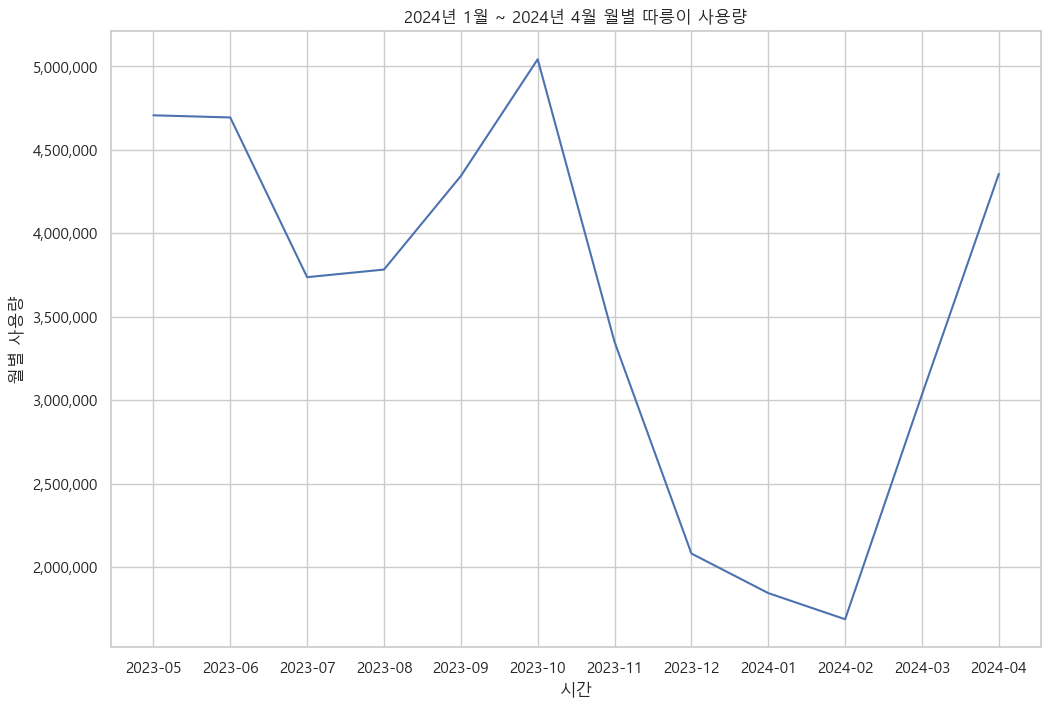

In [197]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(12, 8))

plt.plot(df.index, df["일별 사용량"])

plt.xlabel("시간")
plt.ylabel("월별 사용량")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title("2024년 1월 ~ 2024년 4월 월별 따릉이 사용량")

plt.show()

# 2023년 따릉이 데이터 전처리

In [1]:
import glob
import pandas as pd

total_df = pd.DataFrame()

for i in range(1, 13):

    all_files = glob.glob(f"./data/따릉이/23년/{i}월/*.csv")
    
    for file in all_files:
        temp = pd.read_csv(file, encoding="ISO-8859-1")

        # µµÂø½Ã°£ = 도착시간
        temp = temp.rename(columns = {"½ÃÀÛ_´ë¿©¼Ò_ID":"정류소 ID",
                               "½ÃÀÛ_´ë¿©¼Ò":"정류소 ID",
                               "±âÁØ_³¯Â¥":"날짜",
                               '?"±âÁØ_³¯Â¥"':"날짜",
                               "±âÁØ_½Ã°£":"시간",
                               "±âÁØ_½Ã°£´ë":"시간",
                               "Áý°è_±âÁØ":"집계 기준"})
        
        try:
            temp = temp[["날짜", "집계 기준", "시간", "정류소 ID"]]
            temp = temp[temp["집계 기준"] == "µµÂø½Ã°£"]
            temp = temp.drop("집계 기준", axis = 1)
            
        except:
            temp = temp[["날짜", "시간", "정류소 ID"]]
            
        finally:
            temp["날짜"] = pd.to_datetime(temp["날짜"], format='%Y%m%d')
            temp = temp.reset_index(drop=True)

            total_df = pd.concat([total_df, temp], axis = 0)

In [2]:
total_df.sort_values("날짜").to_csv("2023 따릉이 임시저장.csv", index=False, encoding="utf-8-sig")

In [3]:
total_df.shape

(46604279, 3)

In [50]:
usage_2023 = total_df.groupby("날짜")[["날짜"]].count()
usage_2023.columns = ["사용량"]
usage_2023 = usage_2023.reset_index()
usage_2023["월"] = usage_2023["날짜"].dt.month
usage_2023_monthly = usage_2023.groupby("월")[["사용량"]].sum()

C:\Users\5r2w1\AppData\Local\Temp\ipykernel_1620\652267541.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


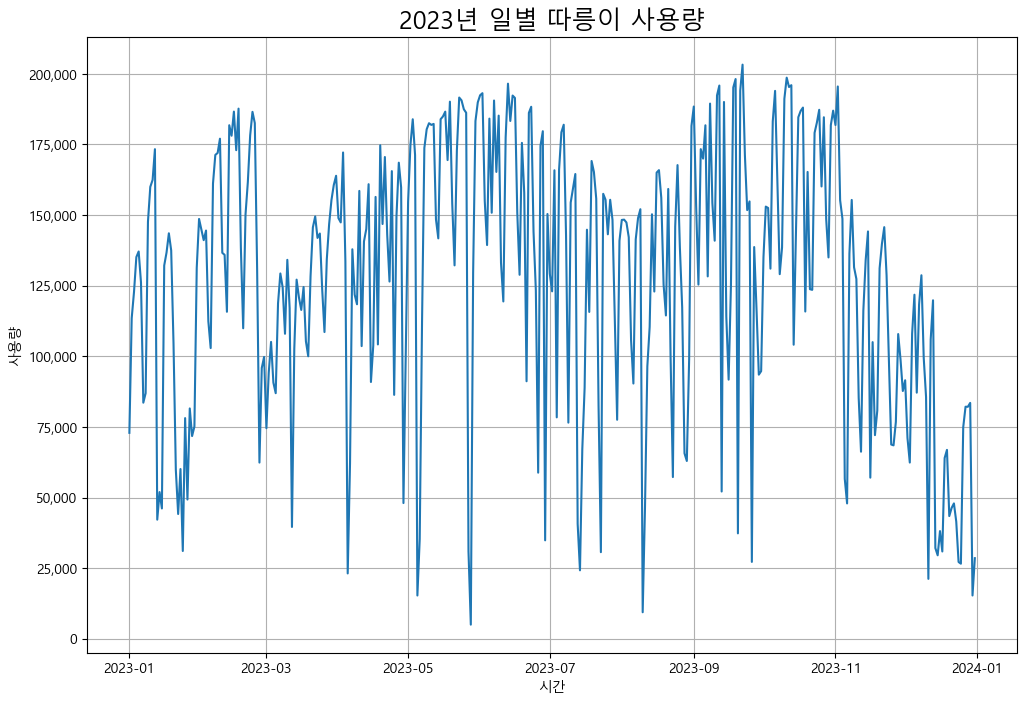

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] ='Malgun Gothic'

plt.plot(usage_2023["날짜"], usage_2023["사용량"])
plt.grid()

plt.xlabel("시간")
plt.ylabel("사용량")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title("2023년 일별 따릉이 사용량", fontsize= 18)

plt.show()

C:\Users\5r2w1\AppData\Local\Temp\ipykernel_1620\511928364.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


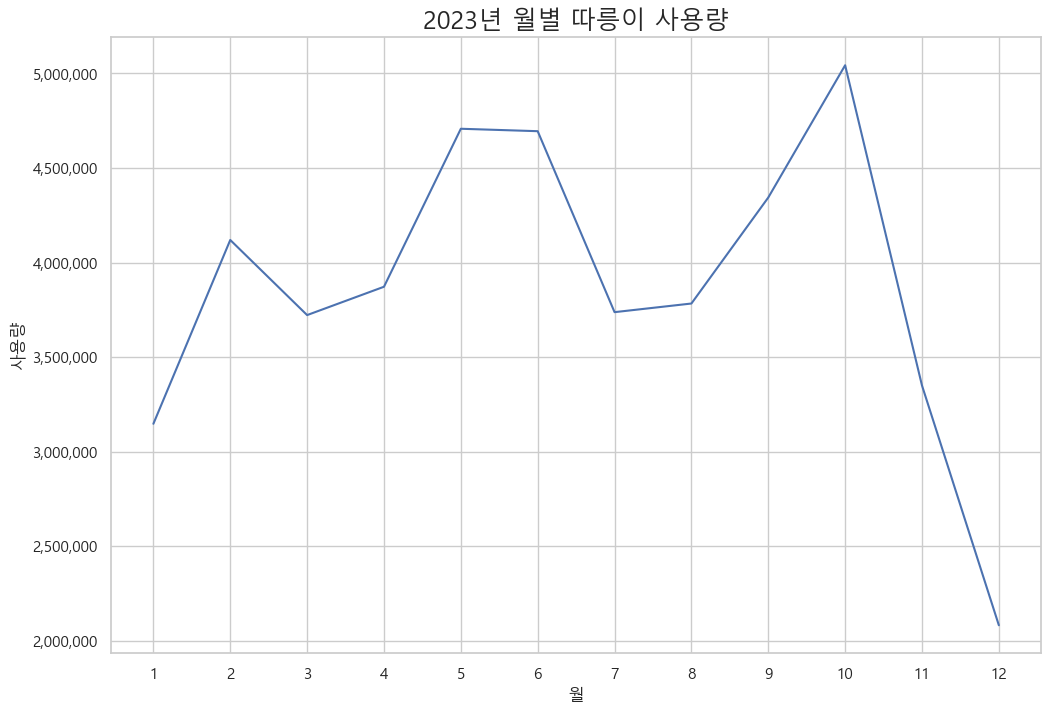

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] ='Malgun Gothic'

plt.plot(usage_2023_monthly)
# plt.grid()

plt.xlabel("월")
plt.xticks(range(1, 13))
plt.ylabel("사용량")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title("2023년 월별 따릉이 사용량", fontsize= 18)

plt.show()

---

In [108]:
df_2024 = pd.DataFrame()

for i in range(1, 5):

    all_files = glob.glob(f"./data/따릉이/24년/{i}월/*.csv")

    data_list = []

    for file in all_files:
        data_frame = pd.read_csv(file, encoding='ISO-8859-1')
        data_list.append(data_frame)

    concat = pd.concat(data_list, axis=0, ignore_index=True)
    
    df_2024 = pd.concat([df_2024, concat], axis = 0, ignore_index=True)

In [109]:
df_2024 = df_2024.rename(columns={"±âÁØ_³¯Â¥":"날짜",
                      "Áý°è_±âÁØ":"집계 기준",
                      "±âÁØ_½Ã°£´ë":"시간",
                      "½ÃÀÛ_´ë¿©¼Ò_ID":"정류소 ID"})

In [110]:
df_2024 = df_2024[["날짜", "집계 기준", "시간", "정류소 ID"]]
df_2024 = df_2024[df_2024["집계 기준"] == "µµÂø½Ã°£"]
df_2024["날짜"] = pd.to_datetime(df_2024["날짜"], format="%Y%m%d")

In [111]:
df_2024 = df_2024.drop("집계 기준", axis = 1)

In [17]:
# df_2024.to_csv("2024 따릉이 임시저장.csv", index=False, encoding="utf-8-sig")

In [309]:
df_2024_4 = df_2024[df_2024["날짜"] >= "2024-04-01"]
df_2024_4 = df_2024_4.groupby("정류소 ID")[["시간"]].count()
top_100 = df_2024_4.sort_values("시간", ascending=False).head(100)

In [312]:
top_100 = top_100.reset_index()

C:\Users\5r2w1\AppData\Local\Temp\ipykernel_1620\4055208687.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


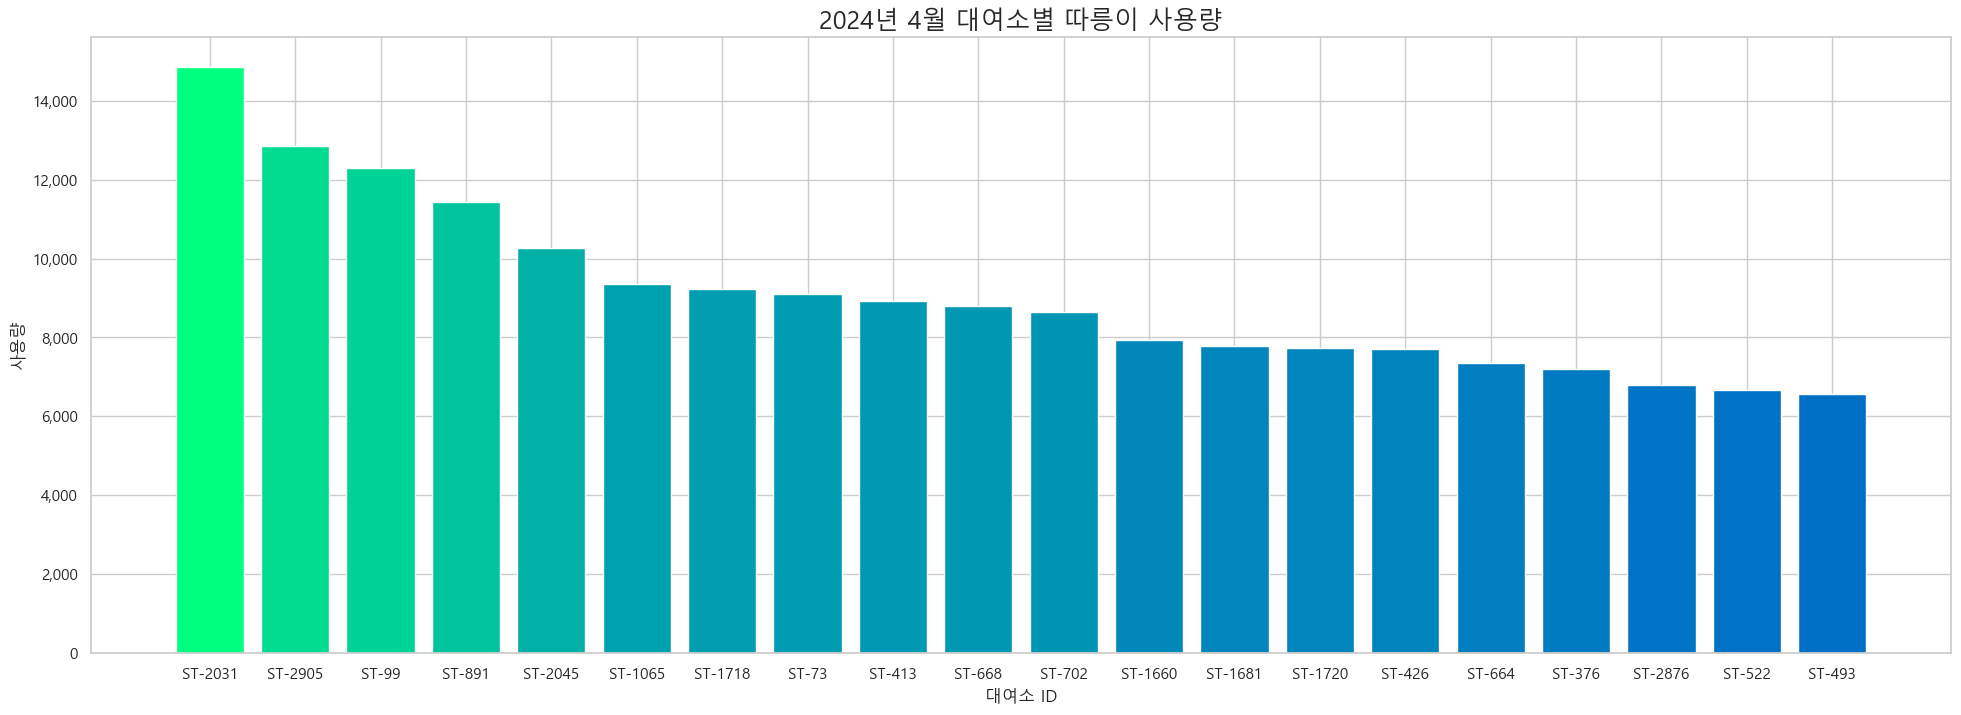

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.figure(figsize=(24, 8))

# 데이터의 최대값 찾기
vmax = df_2024_4["시간"].max()

# Normalize 객체 생성 (최소값을 0으로 설정)
norm = Normalize(vmin=0, vmax=vmax)

# 색상 맵 생성
cmap = cm.get_cmap('winter')

# 색상 지정
colors = cmap(norm(df_2024_4["시간"]))

plt.bar(df_2024_4.index, df_2024_4["시간"], color=colors, yerr=False)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("대여소 ID")
plt.ylabel("사용량")
plt.title("2024년 4월 대여소별 따릉이 사용량", fontsize= 18)

plt.show()

---

In [313]:
station_master = pd.read_csv("서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")
station_master

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323
...,...,...,...,...,...
3281,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541
3282,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000
3283,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798
3284,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593


In [314]:
top_100

,정류소 ID,시간
0,ST-2031,14862
1,ST-2905,12840
2,ST-99,12287
3,ST-891,11419
4,ST-2045,10254
...,...,...
95,ST-2812,4620
96,ST-1440,4614
97,ST-2310,4586
98,ST-2264,4573


In [316]:
top_100 = top_100.merge(station_master, left_on="정류소 ID", right_on="대여소_ID")

In [317]:
top_100

,정류소 ID,시간,대여소_ID,주소1,주소2,위도,경도
0,ST-2031,14862,ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438
1,ST-2905,12840,ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889
2,ST-99,12287,ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192
3,ST-891,11419,ST-891,서울특별시 송파구 올림픽로 293-19,송파구 신천동 28,37.513126,127.100960
4,ST-2045,10254,ST-2045,서울특별시 강서구 마곡동로 115,NaN,37.565804,126.828079
...,...,...,...,...,...,...,...
95,ST-2812,4620,ST-2812,서울특별시 영등포구 영등포구 양평동3가 22-1,NaN,37.525726,126.886002
96,ST-1440,4614,ST-1440,서울특별시 중구 청계천로 400 롯데캐슬베네치아,NaN,37.571014,127.019745
97,ST-2310,4586,ST-2310,서울특별시 광진구 화양동 24-33,NaN,37.544350,127.065407
98,ST-2264,4573,ST-2264,서울특별시 은평구 연서로 9 센타폴리스,NaN,37.599968,126.915726


In [324]:
map_center = [37.5665, 126.9780]
map_zoom = 10

map = folium.Map(location=map_center, zoom_start=map_zoom)

for i in range(len(PM_parking)):
    folium.Circle(
        location=[PM_parking.loc[i]["y"],
                  PM_parking.loc[i]["x"]],
        radius=300,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity = 0.6,
        weight = 0.5
    ).add_to(map)
    
for i in range(len(top_100)):
    folium.Circle(
        location=[top_100.loc[i]["위도"],
                  top_100.loc[i]["경도"]],
        radius=300,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity = 0.5,
        weight = 0.4
    ).add_to(map)
    
map.save('map_pm+sbike.html')

In [304]:
import re

pattern = r'(서울특별시\s+\w+구)'

station_master["주소1"] = station_master["주소1"].str.extract(pattern)

In [305]:
station_master = station_master.drop(["주소2", "위도", "경도"], axis = 1)
station_master = station_master.rename(columns={"대여소_ID":"정류소 ID"})

In [306]:
station_master

,정류소 ID,주소1
0,ST-999,서울특별시 양천구
1,ST-998,서울특별시 양천구
2,ST-997,서울특별시 양천구
3,ST-996,서울특별시 양천구
4,ST-995,서울특별시 양천구
...,...,...
3281,ST-1002,서울특별시 양천구
3282,ST-1001,서울특별시 양천구
3283,ST-1000,서울특별시 양천구
3284,ST-100,서울특별시 광진구


In [292]:
sbike_2024 = pd.merge(concat, station_master, on = "정류소 ID")
sbike_2024["월"] = sbike_2024["날짜"].dt.month
sbike_2024_4 = sbike_2024.groupby(["월", "주소1"])[["시간"]].count()
sbike_2024_4 = sbike_2024_4.reset_index()
sbike_2024_4 = sbike_2024_4.sort_values("시간", ascending=False)

KeyError: '정류소 ID'

In [293]:
pattern = r'(\w+구)'

sbike_2024_4["주소1"] = sbike_2024_4["주소1"].str.extract(pattern)

C:\Users\5r2w1\AppData\Local\Temp\ipykernel_1620\3381443005.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


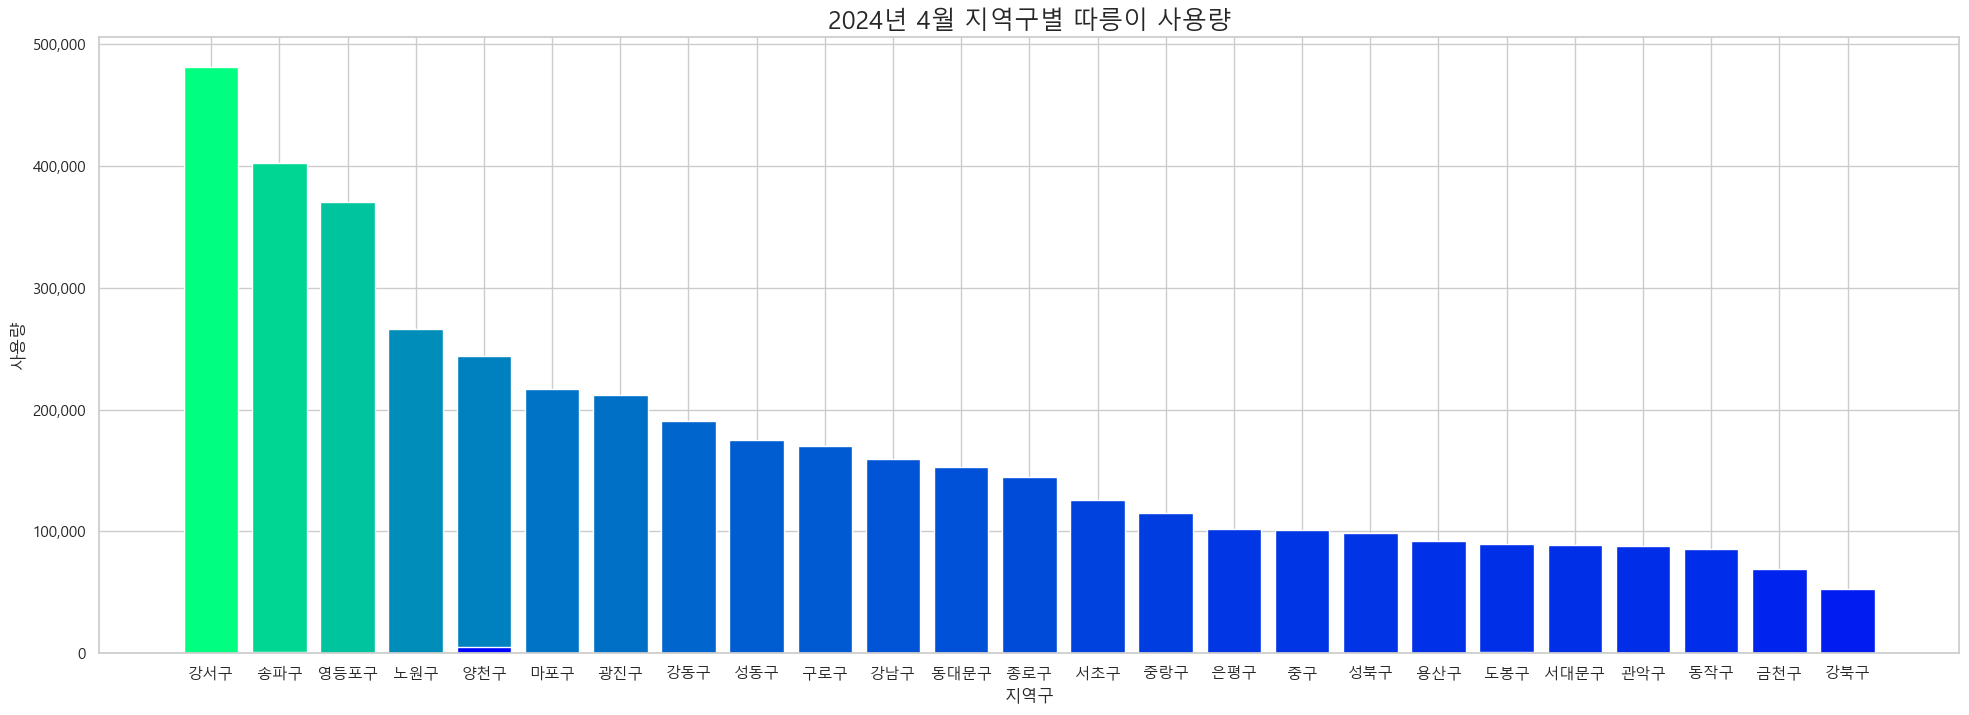

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.figure(figsize=(24, 8))

# 데이터의 최대값 찾기
vmax = sbike_2024_4["시간"].max()

# Normalize 객체 생성 (최소값을 0으로 설정)
norm = Normalize(vmin=0, vmax=vmax)

# 색상 맵 생성
cmap = cm.get_cmap('winter')

# 색상 지정
colors = cmap(norm(sbike_2024_4["시간"]))

plt.bar(sbike_2024_4["주소1"], sbike_2024_4["시간"], color=colors, yerr=False)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("지역구")
plt.ylabel("사용량")
plt.title("2024년 4월 지역구별 따릉이 사용량", fontsize= 18)

plt.show()